# Preamble

In [1]:
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt

In [2]:
# Set this to false for faster execution time
SHOW_IMAGES = True

# Whether or not to save matplotlib figures as pdf output file for latex
USE_LATEX_ENGINE = True

if USE_LATEX_ENGINE:
    import matplotlib
    # matplotlib.use("pgf")     # pgf doesn't work for some plots because they exceed the max value that pgf can calculate
    matplotlib.rcParams.update({
        # "pgf.texsystem": "pdflatex",
        # 'pgf.rcfonts': False,
        'font.family': 'serif',
        'text.usetex': True,
    })

# Function Definitions

In [3]:
def _generate_output_string(element, data):
    """
    Returns a string that contains information about the percentual share of a value in a list
    """
    # if not isinstance(element, str): # make sure element is of type string, convert otherwise
    #     element = str(element)
    
    n_total = len(data)
    bool_list = (data == element)
    n_elements = sum(bool_list)

    return "{:<30}".format(str(n_elements) + '/' + str(n_total) + ' (' + "{:.2f}".format(((n_elements / n_total) * 100)) + '%)')

In [4]:
def calculate_percentages(normal_data, pneumonia_data, additional_df=None):
    """
    checks if two lists contain the same set of values - returns a warning if the sets dont match - prints a string with information about the distribution if they match
    """
    if len(set(normal_data)) is not len(set(pneumonia_data)):
        print('WARNING! Categories of healthy and pneumonia data are not identical!')
        print('Normal: ' + str(set(normal_data)))
        print('Pneumonia: ' + str(set(pneumonia_data)))
        print('Number of appearences (normal):')
        n_normal_set = ''
        for category in set(normal_data):
            n_normal_set += "'" + str(category) + "': " + str(sum(normal_data == category)) + '\n'   # single quote: non-escaped string, double quote: escaped string
        print(n_normal_set)
        return
    else:
        print(set(normal_data))
    if additional_df is None:
        print('{:<21}'.format('') + '{:<30}'.format('normal') + '{:<30}'.format('pneumonia'))
    else:
        print('{:<21}'.format('') + '{:<30}'.format('normal (total)') + '{:<30}'.format('normal (filtered)') + '{:<30}'.format('pneumonia'))

    for element in set(normal_data):
        category_string = "{:<21}".format(str(element) + ': ')
        if additional_df is None:
            print(category_string + _generate_output_string(element, normal_data) + _generate_output_string(element, pneumonia_data))
        else:
            print(category_string + _generate_output_string(element, normal_data) + _generate_output_string(element, additional_df) + _generate_output_string(element, pneumonia_data))

In [5]:
def find_appearences(df, column, value):
    """
    searches for appearences of a specified value within the column of a dataframe - prints the number of appearences and the corresponding indexes
    """
    
    value = str(value)
    print('found ' + str(sum(df[column] == value)) + ' rows')
    index_list = df.index[df[column] == value].tolist()
    print('Indexes: ' + str(index_list))
    return index_list

In [6]:
def drop_from_column(df, column, value, convert_to_string=True):
    """
    searches for appearences of a specified value within a column of a dataframe - drops each row where the value appeared from the dataframe
    """
    if convert_to_string:
        value = str(value)
    print('Dropping ' + str(sum(df[column] == value)) + ' rows')
    index_list = df.index[df[column] == value].tolist()
    df.drop(index_list, inplace=True)

# Data preparation

In [7]:
path_open_i = '/mnt/f/05_DatensaetzeJan/Open-i/'
file_name_projections = 'indiana_projections.csv'
file_name_reports = 'indiana_reports.csv'

projections_csv_df = pd.read_csv(path_open_i + file_name_projections)
projections_csv_df.reset_index(drop=True, inplace=True)

reports_df = pd.read_csv(path_open_i + file_name_reports)
reports_df.reset_index(drop=True, inplace=True)

print('length of projections:', len(projections_csv_df))
print('length of reports:', len(reports_df))


length of projections: 7466
length of reports: 3851


In [8]:
projections_csv_df.fillna('nan', inplace=True)
reports_df.fillna('nan', inplace=True)

In [9]:
projections_csv_df.head()

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal


In [10]:
projections_csv_df.projection.value_counts()

Frontal    3818
Lateral    3648
Name: projection, dtype: int64

In [11]:
drop_from_column(projections_csv_df, 'projection', 'Lateral')

Dropping 3648 rows


In [12]:
reports_df.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",nan,nan,"No displaced rib fractures, pneumothorax, or p..."
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,nan,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [13]:
set(reports_df[reports_df.MeSH.str.contains('normal') & reports_df.Problems.str.contains('normal')].uid) == set(reports_df[reports_df.Problems.str.contains('normal')].uid)

True

In [14]:
len(reports_df[reports_df.Problems == 'normal'])

1379

In [15]:
normal_uids = reports_df[reports_df.Problems == 'normal'].uid

In [16]:
final_reports_df = reports_df[reports_df.Problems == 'normal']

In [17]:
normal_uids = list(normal_uids)

In [18]:
final_projections_df = projections_csv_df[projections_csv_df.uid.isin(normal_uids)]

In [19]:
len(final_projections_df)

1387

In [20]:
final_projections_df.iloc[0].filename[:-8]

'1_IM-0001-4001'

In [21]:
final_projections_df['filename'] = 'CXR' + final_projections_df.filename.str[:-8] + '.png'

In [22]:
final_projections_df.iloc[0].filename

'CXR1_IM-0001-4001.png'

=== 1. sample study ===
CXR3588_IM-1766-1001.png


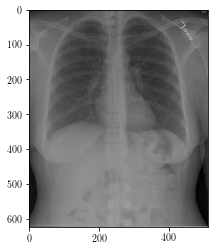



=== 2. sample study ===
CXR328_IM-1560-1001.png


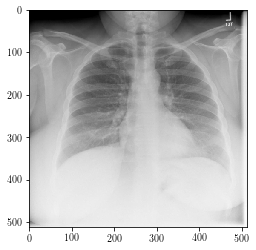



=== 3. sample study ===
CXR2304_IM-0882-4004.png


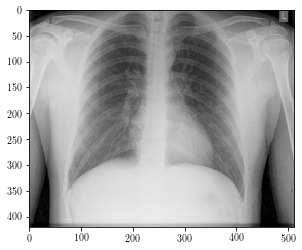



=== 4. sample study ===
CXR1689_IM-0451-1001.png


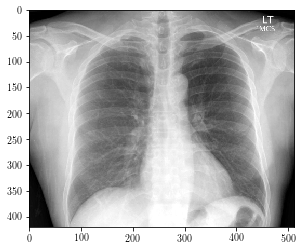



=== 5. sample study ===
CXR1964_IM-0629-1001.png


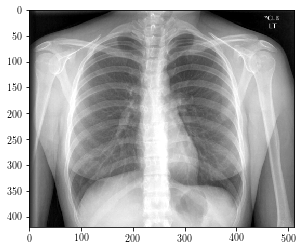



=== 6. sample study ===
CXR428_IM-2070-1001.png


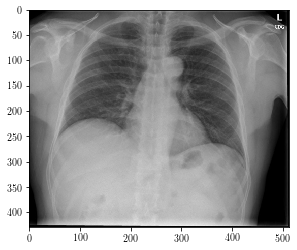



=== 7. sample study ===
CXR1698_IM-0458-1001.png


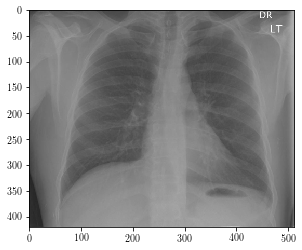



=== 8. sample study ===
CXR1766_IM-0500-1001.png


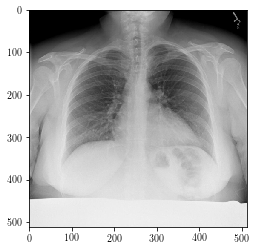



=== 9. sample study ===
CXR3939_IM-2010-1001.png


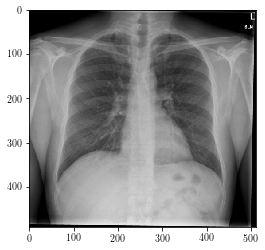



=== 10. sample study ===
CXR962_IM-2453-1002001.png


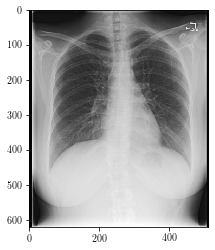

In [23]:
import matplotlib.image as mpimg

num = 1
for sample in final_projections_df.sample(n=10).itertuples():
    if not SHOW_IMAGES:
        break

    print('=== ' + str(num) + '. sample study ===')

    num = num + 1
    
    print(sample.filename)

    file_path = path_open_i + 'NLMCXR_png/' + sample.filename
    
    plt.figure(num)
    img = mpimg.imread(file_path)
    imgplot = plt.imshow(img, cmap="gray")
    plt.show()
    
    print('\n')



# Store results as csv files

In [24]:
final_projections_df.to_csv('./projections_filtered.csv')
final_reports_df.to_csv('./reports_filtered.csv')